In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\DATASETS\customer_churn_data.csv")
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [9]:
df.shape

(1000, 10)

In [15]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [17]:
df.isnull()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,True,False,False,False


In [21]:
df.isnull().sum().reset_index()

,index,0
0,CustomerID,0
1,Age,0
2,Gender,0
3,Tenure,0
4,MonthlyCharges,0
5,ContractType,0
6,InternetService,297
7,TotalCharges,0
8,TechSupport,0
9,Churn,0


In [27]:
#count the true or false churn
true_churn = df[df.Churn == 'Yes']
false_churn = df[df.Churn == 'No']
print(f"true_churn: {true_churn.shape}")
print(f"false_churn: {false_churn.shape}")

true_churn: (883, 10)
false_churn: (117, 10)


In [31]:
#total number of males and females
male = df[df.Gender == 'Male']
female = df[df.Gender == 'Female']
print(f"Males: {male.shape}")
print(f"Female: {female.shape}")

Males: (462, 10)
Female: (538, 10)


In [89]:
internet_service_total_charges = df.groupby('InternetService',observed=False)['TotalCharges'].sum().reset_index()
internet_service_total_charges

,InternetService,TotalCharges
0,DSL,428180.68
1,Fiber Optic,556287.95


In [41]:
internet_service = df.groupby('InternetService',observed=False)['MonthlyCharges'].sum().reset_index()
internet_service

,InternetService,MonthlyCharges
0,DSL,22224.75
1,Fiber Optic,29658.06


In [31]:
tech_support = df[df.TechSupport == 'Yes']
no_tech_support = df[df.TechSupport == 'No']
print(f"tech_support: {tech_support.shape}")
print(f"no_tech_support: {no_tech_support.shape}")

tech_support: (506, 10)
no_tech_support: (494, 10)


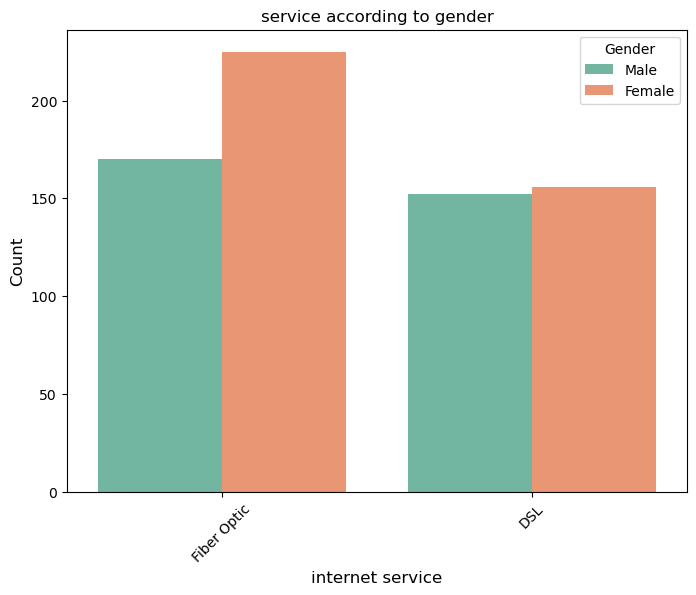

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService',hue='Gender',data=df,palette='Set2')
plt.title('service according to gender')
plt.xlabel('internet service' , fontsize=12)
plt.ylabel('Count' , fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

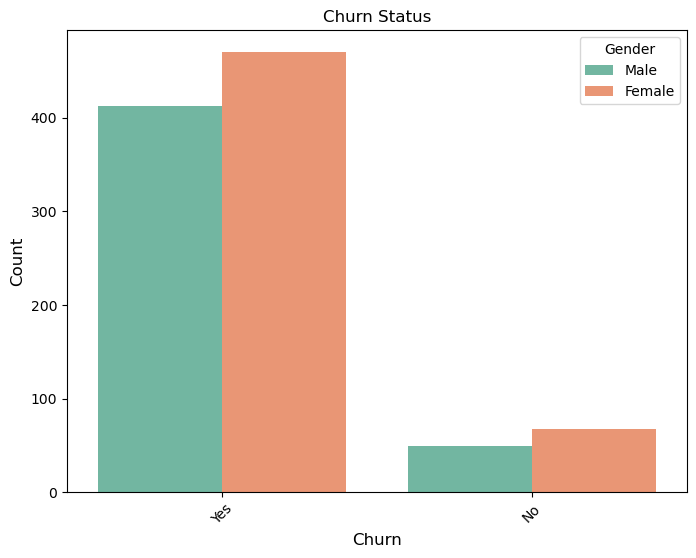

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='Churn',hue='Gender',data=df,palette='Set2')
plt.title('Churn Status')
plt.xlabel('Churn' , fontsize=12)
plt.ylabel('Count' , fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

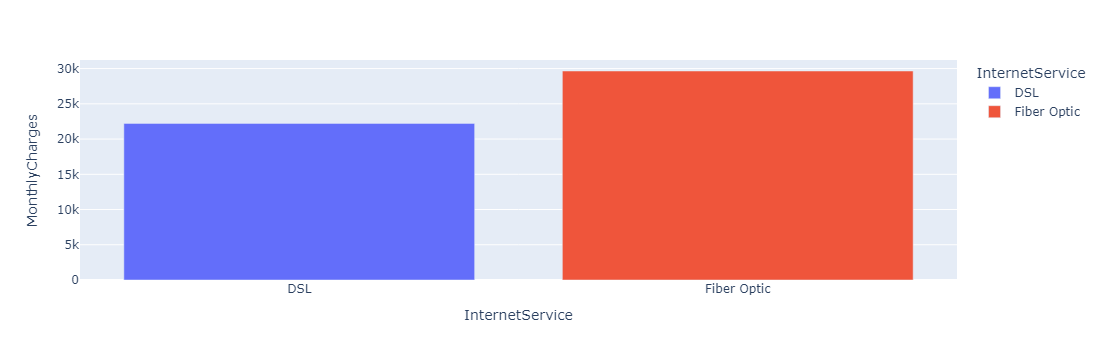

In [79]:
px.bar(data_frame=internet_service,x='InternetService',y='MonthlyCharges',color='InternetService',labels={'MonthlyCharges'})

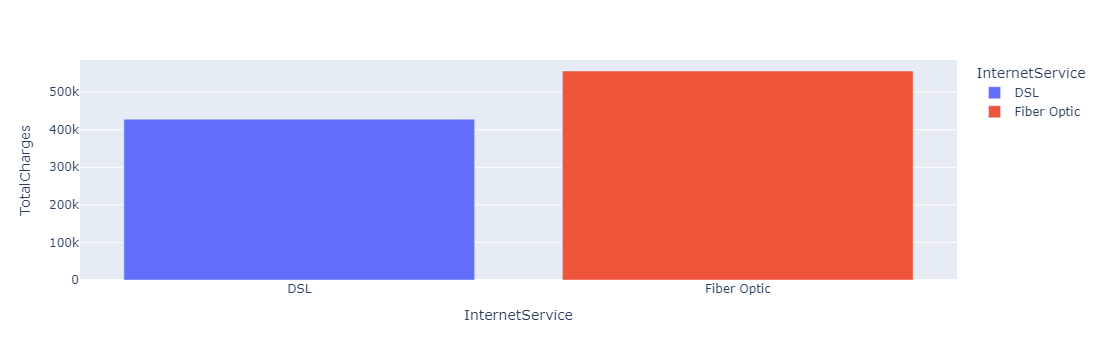

In [91]:
px.bar(data_frame=internet_service_total_charges,x='InternetService',y='TotalCharges',color='InternetService',labels={'TotalCharges'})

In [95]:
avg_charges = df.groupby('InternetService',observed = False)['TotalCharges'].mean().reset_index().sort_values(by = 'TotalCharges',ascending=False)
avg_charges

,InternetService,TotalCharges
1,Fiber Optic,1408.323924
0,DSL,1390.197013


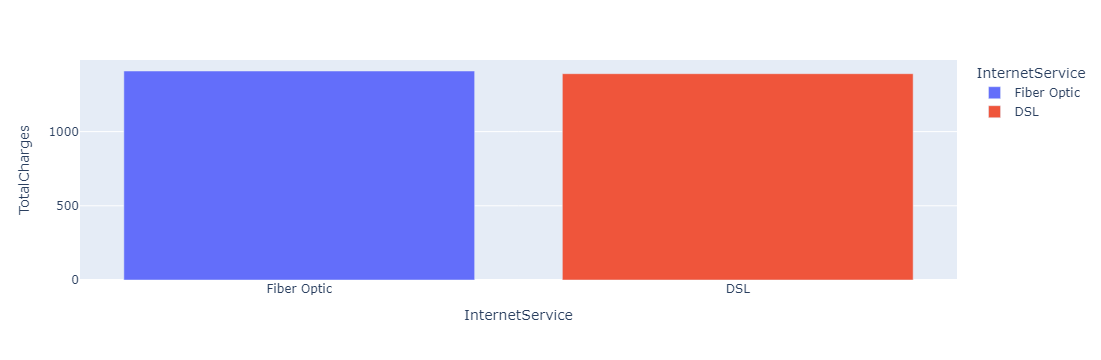

In [111]:
px.bar(data_frame=avg_charges,x='InternetService',y='TotalCharges',color='InternetService',labels={'TotalCharges'})

In [133]:
null_values = df['InternetService'].isnull().reset_index()
null_values

,index,InternetService
0,0,False
1,1,False
2,2,False
3,3,False
4,4,True
...,...,...
995,995,False
996,996,True
997,997,False
998,998,True


In [161]:
Nan = df[df.InternetService == 'NaN']
print(f"Nan: {Nan.shape}")

Nan: (0, 10)


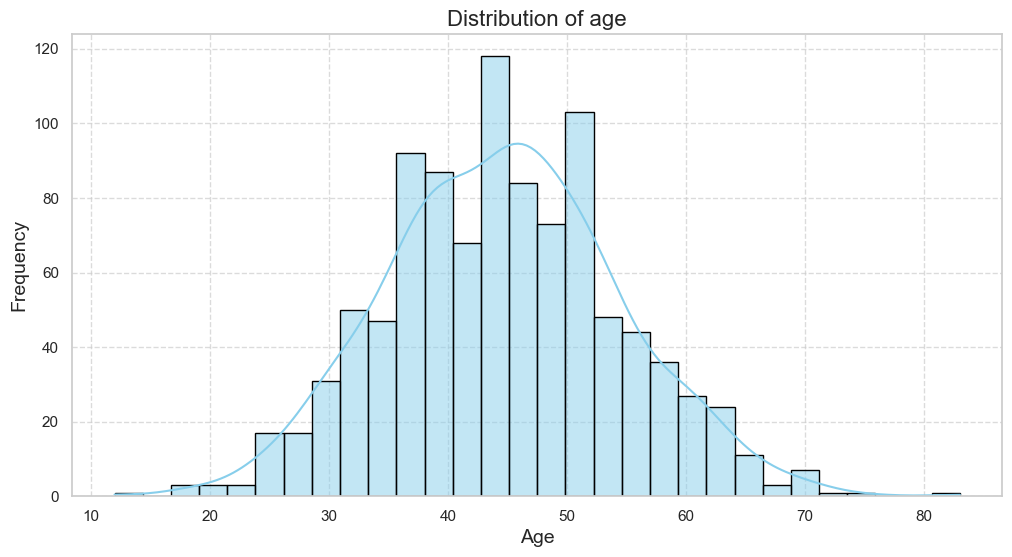

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(df['Age'],bins=30,kde=True,color='skyblue',edgecolor='black')
plt.title('Distribution of age' , fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

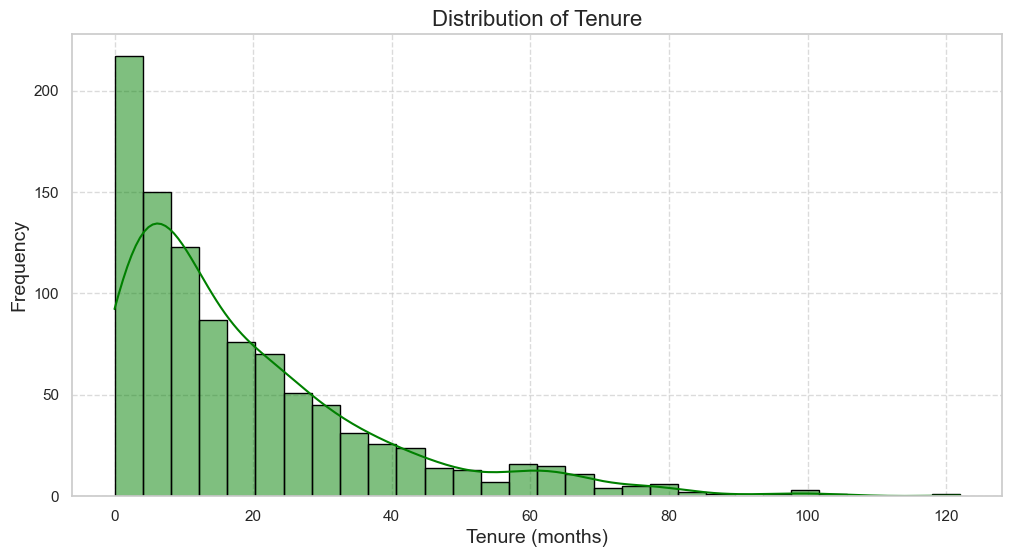

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['Tenure'],bins=30,kde=True,color='green',edgecolor='black')
plt.title('Distribution of Tenure' , fontsize=16)
plt.xlabel('Tenure (months)',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

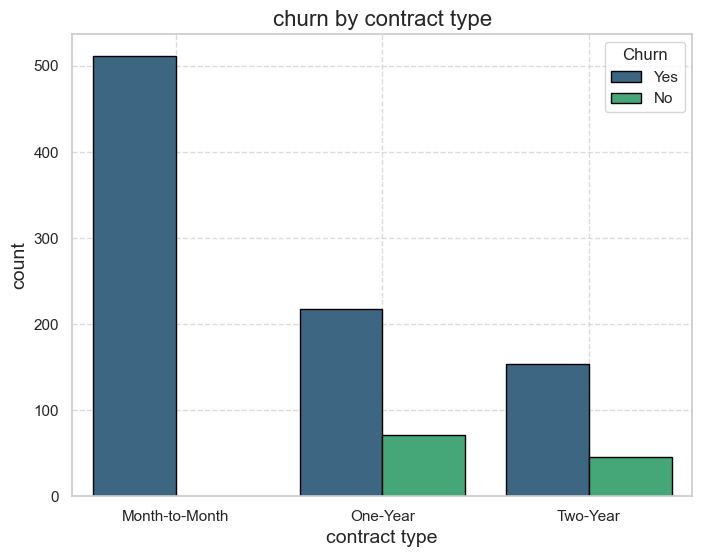

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='ContractType',hue='Churn',data=df,palette='viridis',edgecolor='black')
plt.title('churn by contract type' , fontsize=16)
plt.xlabel('contract type',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.legend(title='Churn',loc='upper right')
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

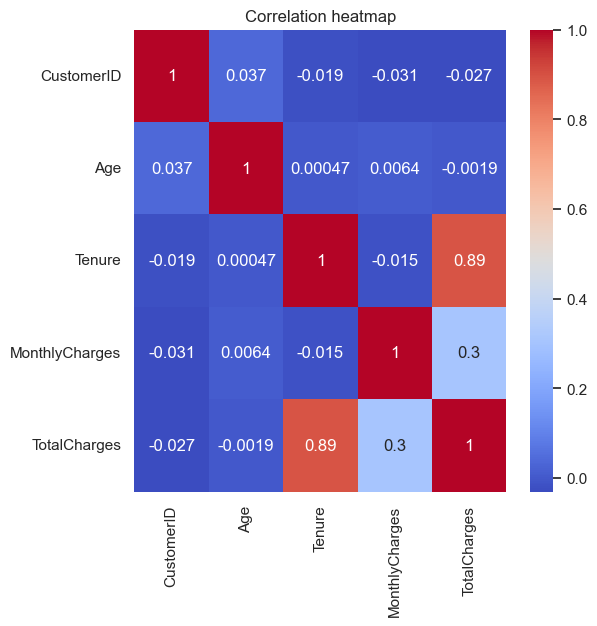

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(6,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()